In [1]:
import jax
import numpy as np
from jax import numpy as jnp
import matplotlib.pylab as plt
import matplotlib
import netket as nk
from netket.operator.spin import sigmax, sigmaz

/Users/megan/miniconda3/envs/netket/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append('..')
from dset_helpers import make_data

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 8,
    "font.family": "Helvetica",
    'savefig.dpi': 100,
    'figure.dpi': 100

})

bigger_font_size=10
column_width = 3.375

In [4]:
def convert_samples_to_index(samples):
    binary_vectors = (samples + 1) // 2 
    powers_of_two = 2 ** jnp.arange(samples.shape[-1])[::-1]  
    indices = jnp.dot(binary_vectors, powers_of_two) 
    return indices

# Make state

In [5]:
N = 12
h = -1.0

# Hamiltonian & Exact Energy
graph = nk.graph.Chain(length=N, pbc=True)
hi = nk.hilbert.Spin(s=0.5,N=N)
ha = sum([h*sigmax(hi,i) for i in range(N)])
ha += sum([-sigmaz(hi,i)*sigmaz(hi,(i+1)%N) for i in range(N)])
E_gs, gs = nk.exact.lanczos_ed(ha,compute_eigenvectors=True)


# Figure 2, supplement

NUM HIGH PROB SAMPLES IN TEST: 0
mean of all y: 0.00024414062499999984
mean of test y: 3.685929292795491e-06
NUM HIGH PROB SAMPLES IN TEST: 0
NUM HIGH PROB SAMPLES IN TEST: 0
NUM HIGH PROB SAMPLES IN TEST: 1


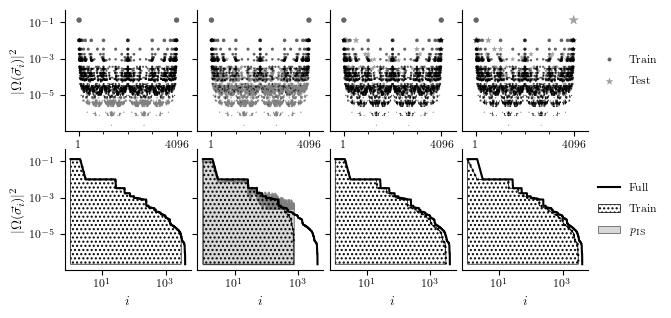

In [6]:
fig,axs = plt.subplots(2,4,sharey=True,figsize=(2*column_width,column_width))
fig.subplots_adjust(hspace=0.15)
fig.subplots_adjust(wspace=0.05)


## probs split
seed = 10
split = 'probs'
test_frac = 0.25
data_key = jax.random.PRNGKey(seed)
x_train, x_test, y_train, y_test, target_logpsis = make_data(h, gs, data_key,
                                                             how_to_split=split,
                                                             test_frac=test_frac,
                                                             save=False,
                                                             save_train_inds=False)
all_y = np.exp(target_logpsis)**2
print("mean of all y:", np.mean(all_y))
print("mean of test y:", np.mean(y_test))


axs[0,0].scatter(convert_samples_to_index(x_train), y_train, marker = ".", s=100*np.cbrt(y_train), linewidth=0.2, color='k',alpha=0.6,label=r'$\mathrm{Train}$',zorder=1)
axs[0,0].scatter(convert_samples_to_index(x_test), y_test, marker = "*", s=100*np.cbrt(y_test), linewidth=0.2, color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$',zorder=0)
axs[0,0].set_yscale('log')
axs[0,0].set_xlim(-600,4696)
axs[0,0].set_ylim(0.5*min(min(y_test),min(y_train)),5*10**-1)
axs[0,0].set_xticks([0,4096])
axs[0,0].set_xticklabels([r'$1$',r'$4096$'])
axs[0,0].minorticks_on()
axs[0,0].set_xlabel(r"$i$",fontsize=bigger_font_size)
axs[0,0].set_ylabel(r"$\vert \Omega(\vec{\sigma}_i)\vert^2$",fontsize=bigger_font_size)

axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)

all_y = np.squeeze(np.exp(target_logpsis)**2)
all_y_sorted = np.sort(all_y)[::-1]
plot_x = np.arange(1,len(all_y_sorted)+1)
axs[1,0].plot(plot_x,all_y_sorted,color='k',label=r'$\mathrm{Full}$')

y_train_sorted = np.sort(np.squeeze(y_train))[::-1]
plot_x_train = np.arange(1,len(y_train)+1)
axs[1,0].plot(plot_x_train,y_train_sorted,color='k',linestyle=':')
axs[1,0].fill_between(plot_x_train, y_train_sorted, min(all_y_sorted), color='None',edgecolor='k', linewidth=0.5,hatch='....', label=r'$\mathrm{Train}$')

axs[1,0].set_yscale('log')
axs[1,0].set_xscale('log')
axs[1,0].set_ylabel(r"$\vert \Omega(\vec{\sigma}_i)\vert^2$",fontsize=bigger_font_size)
axs[1,0].set_xlabel(r"$i$",fontsize=bigger_font_size)

axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

## mc split
seed = 10
split = 'mc'
test_frac = 0.25
data_key = jax.random.PRNGKey(seed)
x_train, x_test, y_train, y_test, target_logpsis = make_data(h, gs, data_key,
                                                             how_to_split=split,
                                                             test_frac=test_frac,
                                                             save=False,
                                                             save_train_inds=False)

train_indices = convert_samples_to_index(x_train)
unique_train_x,counts = np.unique(train_indices,return_counts=True)
unique_train_y = np.exp(target_logpsis[unique_train_x])**2

axs[0,1].scatter(unique_train_x, np.squeeze(unique_train_y), marker = ".", s=100*np.cbrt(unique_train_y), linewidth=0.2, color='k',alpha=0.6,label=r'$\mathrm{Train}$',zorder=1)
axs[0,1].scatter(convert_samples_to_index(x_test), y_test, marker = "*", s=100*np.cbrt(y_test), linewidth=0.2, color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$',zorder=0)
axs[0,1].set_yscale('log')
axs[0,1].set_xlim(-600,4696)
axs[0,1].set_ylim(0.5*min(min(y_test),min(y_train)),5*10**-1)

axs[0,1].set_xticks([0,4096])
axs[0,1].set_xticklabels([r'$1$',r'$4096$'])
axs[0,1].minorticks_on()
axs[0,1].set_xlabel(r"$i$",fontsize=bigger_font_size)

axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)

all_y = np.squeeze(np.exp(target_logpsis)**2)
all_y_sorted = np.sort(all_y)[::-1]
plot_x = np.arange(1,len(all_y_sorted)+1)
axs[1,1].plot(plot_x,all_y_sorted,color='k')

y_train_sorted = np.sort(np.squeeze(unique_train_y))[::-1]
plot_x_train = np.arange(1,len(unique_train_y)+1)
axs[1,1].plot(plot_x_train,y_train_sorted,color='k',linestyle=':')
axs[1,1].fill_between(plot_x_train, y_train_sorted, min(all_y_sorted), color='None',edgecolor='k', linewidth=0.5,hatch='....', label=r'$\mathrm{Train}$')

order = np.argsort(np.squeeze(unique_train_y))[::-1]
probs_from_counts = counts[order]/2**N
plot_x_train = np.arange(1,len(unique_train_y)+1)
axs[1,1].plot(plot_x_train,probs_from_counts,color='grey',alpha=0.8,linestyle='-',linewidth=1.5,zorder=-1)
fill_grey = matplotlib.colors.colorConverter.to_rgba('grey', alpha=.3)
axs[1,1].fill_between(plot_x_train,probs_from_counts, min(all_y_sorted), color=fill_grey, edgecolor='grey', linewidth=0.75, label=r'$p_\mathrm{MC}$',zorder=-2)

axs[1,1].set_yscale('log')
axs[1,1].set_xscale('log')
axs[1,1].set_xlabel(r"$i$",fontsize=bigger_font_size)

axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

## random -- good seed
seed = 20
split = 'random'
test_frac = 0.25
data_key = jax.random.PRNGKey(seed)
x_train, x_test, y_train, y_test, target_logpsis = make_data(h, gs, data_key,
                                                             how_to_split=split,
                                                             test_frac=test_frac,
                                                             save=False,
                                                             save_train_inds=False)


axs[0,2].scatter(convert_samples_to_index(x_train), y_train, marker = ".", s=100*np.cbrt(y_train), linewidth=0.2, color='k',alpha=0.6,label=r'$\mathrm{Train}$',zorder=1)
axs[0,2].scatter(convert_samples_to_index(x_test), y_test, marker = "*", s=100*np.cbrt(y_test), linewidth=0.2, color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$',zorder=0)
axs[0,2].set_yscale('log')
axs[0,2].set_xlim(-600,4696)
axs[0,2].set_ylim(0.5*min(min(y_test),min(y_train)),5*10**-1)

axs[0,2].set_xticks([0,4096])
axs[0,2].set_xticklabels([r'$1$',r'$4096$'])
axs[0,2].minorticks_on()
axs[0,2].set_xlabel(r"$i$",fontsize=bigger_font_size)

axs[0,2].spines['top'].set_visible(False)
axs[0,2].spines['right'].set_visible(False)

all_y = np.squeeze(np.exp(target_logpsis)**2)
all_y_sorted = np.sort(all_y)[::-1]
plot_x = np.arange(1,len(all_y_sorted)+1)
axs[1,2].plot(plot_x,all_y_sorted,color='k',label=r'$\mathrm{Full}$')

y_train_sorted = np.sort(np.squeeze(y_train))[::-1]
plot_x_train = np.arange(1,len(y_train)+1)
axs[1,2].plot(plot_x_train,y_train_sorted,color='k',linestyle=':')
axs[1,2].fill_between(plot_x_train, y_train_sorted, min(all_y_sorted), color='None',edgecolor='k', linewidth=0.5,hatch='....', label=r'$\mathrm{Train}$')

axs[1,2].set_yscale('log')
axs[1,2].set_xscale('log')
axs[1,2].set_xlabel(r"$i$",fontsize=bigger_font_size)

axs[1,2].spines['top'].set_visible(False)
axs[1,2].spines['right'].set_visible(False)

## random -- bad seed
seed = 10
split = 'random'
test_frac = 0.25
data_key = jax.random.PRNGKey(seed)
x_train, x_test, y_train, y_test, target_logpsis = make_data(h, gs, data_key,
                                                             how_to_split=split,
                                                             test_frac=test_frac,
                                                             save=False,
                                                             save_train_inds=False)


axs[0,3].scatter(convert_samples_to_index(x_train), y_train, marker = ".", s=100*np.cbrt(y_train), linewidth=0.2, color='k',alpha=0.6,label=r'$\mathrm{Train}$',zorder=1)
axs[0,3].scatter(convert_samples_to_index(x_test), y_test, marker = "*", s=100*np.cbrt(y_test), linewidth=0.2, color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$',zorder=0)
axs[0,3].set_yscale('log')
axs[0,3].set_xlim(-600,4696)
axs[0,3].set_ylim(0.5*min(min(y_test),min(y_train)),5*10**-1)

axs[0,3].set_xticks([0,4096])
axs[0,3].set_xticklabels([r'$1$',r'$4096$'])
axs[0,3].minorticks_on()
axs[0,3].set_xlabel(r"$i$",fontsize=bigger_font_size)

axs[0,3].spines['top'].set_visible(False)
axs[0,3].spines['right'].set_visible(False)

axs[0,3].legend(loc='center left',bbox_to_anchor=(1.0,0.5),frameon=False,labelspacing=1)

all_y = np.squeeze(np.exp(target_logpsis)**2)
all_y_sorted = np.sort(all_y)[::-1]
plot_x = np.arange(1,len(all_y_sorted)+1)
axs[1,3].plot(plot_x,all_y_sorted,color='k',label=r'$\mathrm{Full}$')

y_train_sorted = np.sort(np.squeeze(y_train))[::-1]
plot_x_train = np.arange(1,len(y_train)+1)
axs[1,3].plot(plot_x_train,y_train_sorted,color='k',linestyle=':')
axs[1,3].fill_between(plot_x_train, y_train_sorted, min(all_y_sorted), color='None',edgecolor='k',linewidth=0.5,hatch='....', label=r'$\mathrm{Train}$')
axs[1,3].plot(np.nan,np.nan,color='grey',alpha=0.8,linestyle='-',linewidth=1.5,zorder=-1)

axs[1,3].fill_between(plot_x_train, np.nan, np.nan, color=fill_grey,edgecolor='grey', linewidth=0.75, label=r'$p_\mathrm{IS}$')

axs[1,3].set_yscale('log')
axs[1,3].set_xscale('log')
axs[1,3].set_xlabel(r"$i$",fontsize=bigger_font_size)

axs[1,3].legend(loc='center left',bbox_to_anchor=(1.0,0.5),frameon=False,labelspacing=1)

axs[1,3].spines['top'].set_visible(False)
axs[1,3].spines['right'].set_visible(False)


plt.savefig(f'./figures/all_datasets.pdf',bbox_inches='tight')
plt.show()
